## Algerian Forest Fire Dataset

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('/Users/kushagragahlaut/Desktop/code/Algerian forest fire.csv',header =1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Information: 

Temparature : temperature noon (temperature max) in Celsius degrees: 22 to 42 

RH : Relative Humidity in %: 21 to 90

Ws : Wind speed in km/h: 6 to 29

Rain : total day in mm: 0 to 16.8 FWI Components

FFMC : Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

DMC : Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

DC : Drought Code (DC) index from the FWI system: 7 to 220.4

ISI : Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

BUI: Buildup Index

FWI : Fire Weather Index

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [7]:
# missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The Region is converted into 2 sets based on Region from 122th index, 

make a new column based on region

1: Bejaia Region Dataset

2: Sidi-Bel Abbes Region Dataset



In [8]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
#changing Region to int 
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [12]:
#remove null values
df=df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
#remove redundant header row
df= df.drop(122).reset_index(drop=True)

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
#fix the space in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### change the required columns as int data type

In [18]:

df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB




#### Changing other columns to float datatype



In [21]:
objects =[features for features in df.columns if df[features].dtypes== 'O']

In [22]:
#classes is a categorical feature
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [24]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
# lets save the clean dataset
df.to_csv('Algerian_forest_fire_clean_dataset.csv',index = False) #so that index doesnt get saved along with the data

## Exploratory Data Analysis

In [34]:
df_copy = df.drop(['day','month','year'], axis =1)

In [35]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
df_copy['Classes'].value_counts()  #some error in the data

fire             131
not fire         101
fire               4
not fire           2
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [37]:
#Encoding of the categories in classes
df_copy['Classes']= np.where(df_copy['Classes'].str.contains('not fire'), 0,1)

In [38]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

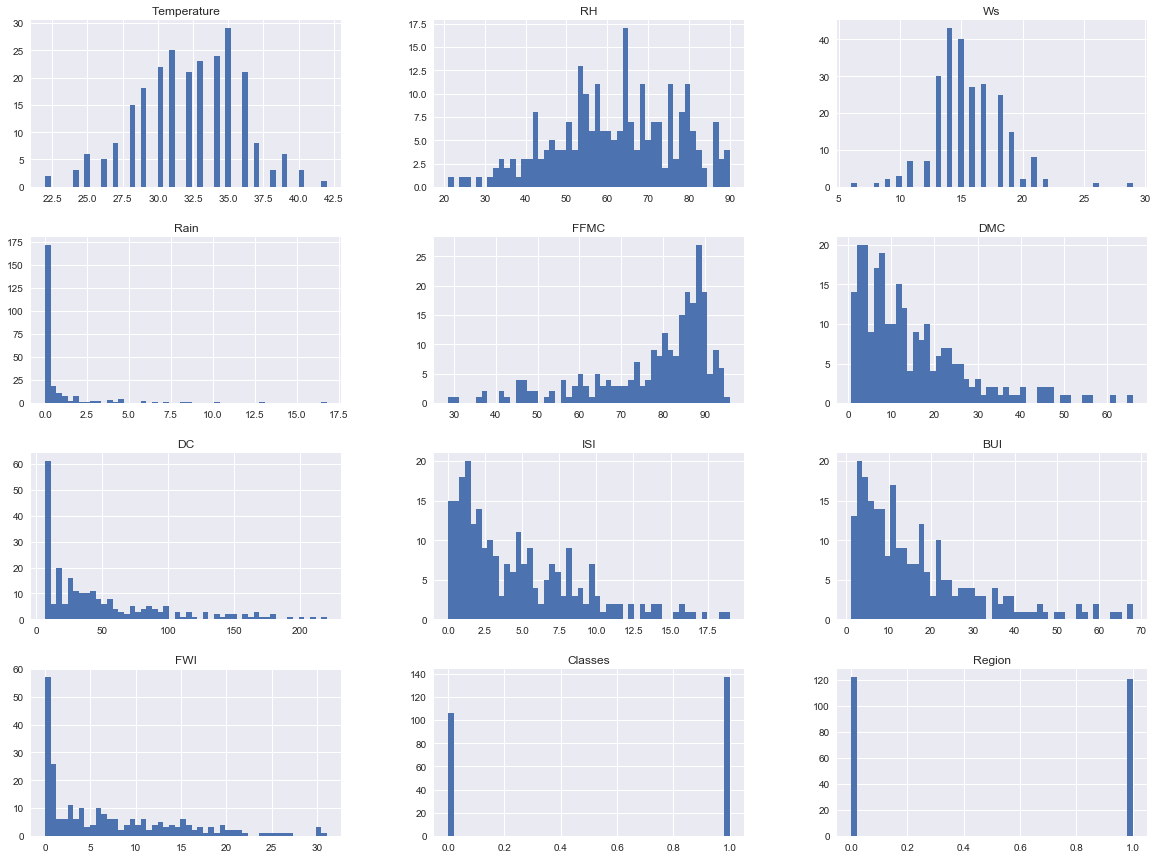

In [45]:
# density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize = (20,15))
plt.show

In [49]:
#percentage pie chart
perc = df_copy['Classes'].value_counts(normalize=True)*100

<function matplotlib.pyplot.show(*args, **kw)>

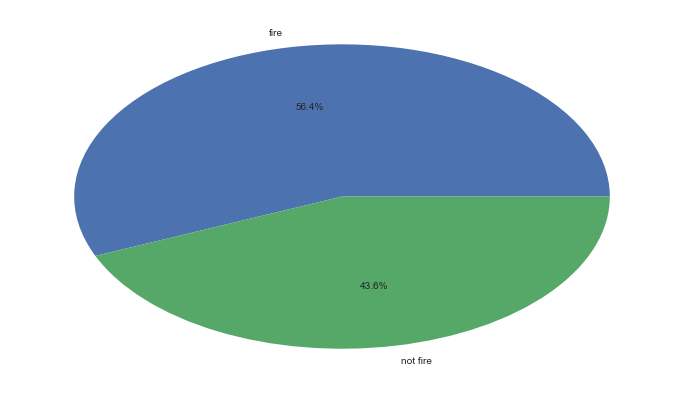

In [50]:
#plotting piechart
classlabels = ['fire', 'not fire']
plt.figure(figsize=(12,7))
plt.pie(perc,labels=classlabels, autopct='%1.1f%%')
plt.show

In [52]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


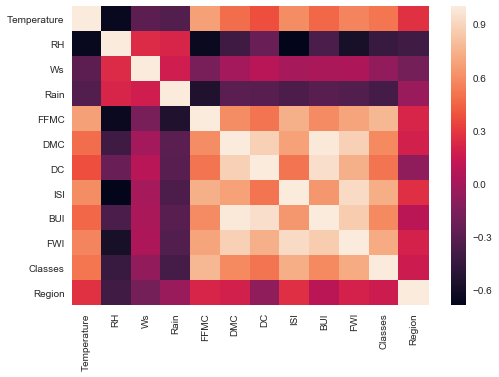

In [54]:
sns.heatmap(df_copy.corr())

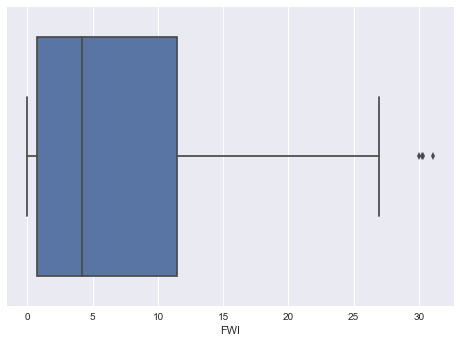

In [56]:
##box plot
sns.boxplot(df_copy['FWI'])

In [57]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'), 'Not Fire','Fire')

### Monthly fire analysis for Both Regions



Text(0.5,1,'Fire analysis of Sidi-Bel Region')

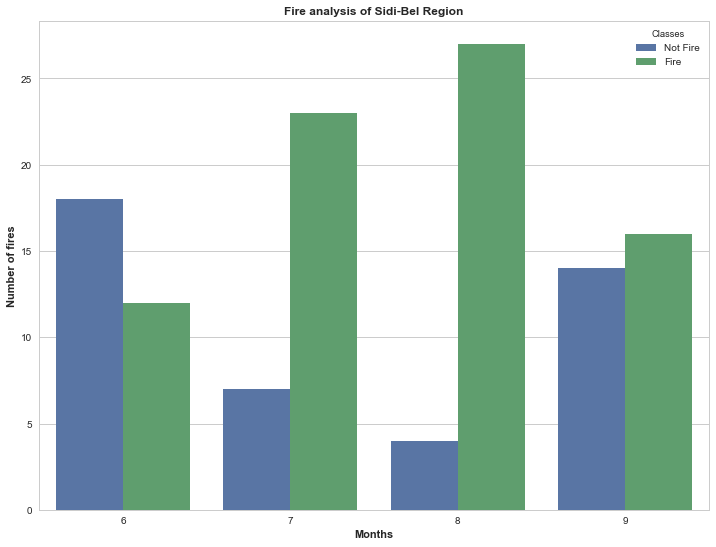

In [73]:
df_temp= df.loc[df['Region']== 1]
plt.subplots(figsize=(12,9))
sns.set_style('whitegrid')
sns.countplot(x='month', hue= 'Classes', data=df_temp)
plt.ylabel('Number of fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire analysis of Sidi-Bel Region', weight = 'bold')

Text(0.5,1,'Fire analysis of Bejaia Region')

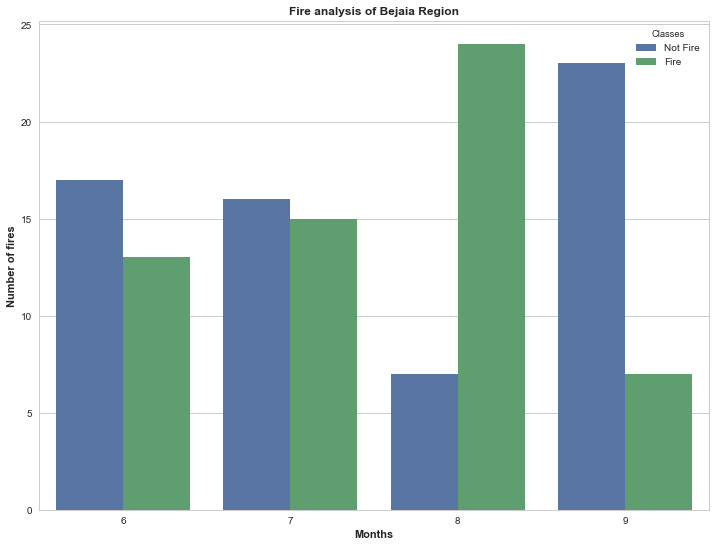

In [74]:
df_temp1= df.loc[df['Region']== 0]
plt.subplots(figsize=(12,9))
sns.set_style('whitegrid')
sns.countplot(x='month', hue= 'Classes', data=df_temp1)
plt.ylabel('Number of fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire analysis of Bejaia Region', weight = 'bold')

It is observed that most fires was experienced in the month of August and for July Sidi-bel has more instance of fires when compared to Bejaia



# Model Training

In [148]:
df1 = pd.read_csv('Algerian_forest_fire_clean_dataset.csv')

In [149]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [150]:
df1.drop(['day','month','year'], axis=1, inplace= True)

In [151]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [152]:
df1['Classes'].value_counts()

fire             131
not fire         101
fire               4
not fire           2
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [153]:
#encodind
df1['Classes'] = np.where(df1['Classes'].str.contains('not fire'),0,1)

In [154]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [155]:
df1.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [156]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

#### Setting up independent and dependent features for regression

In [157]:
X = df1.drop('FWI',axis=1)
y = df1['FWI']

In [158]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [159]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [160]:
# train- test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [161]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [162]:
#feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


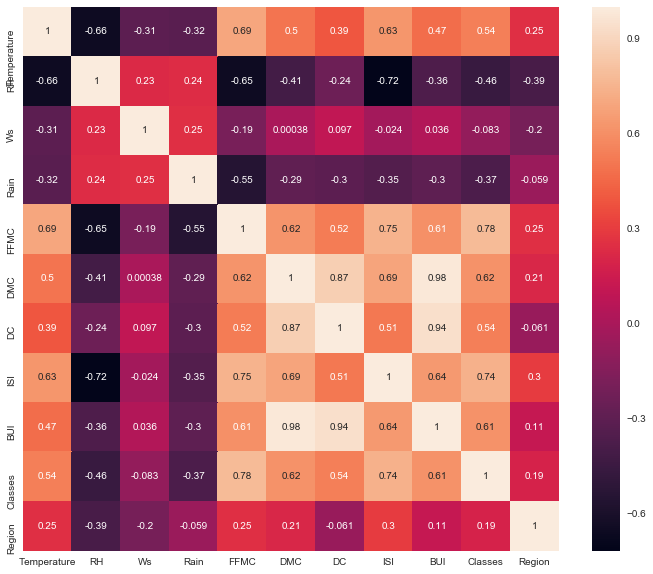

In [163]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   #vif above 10 is too high... i.e., higher multicollinearity

X = df1
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0   Temperature  110.184181
1            RH   32.238504
2            Ws   37.177877
3          Rain    1.656125
4          FFMC  128.608893
5           DMC  205.793767
6            DC   51.662096
7           ISI   53.026096
8           BUI  416.741170
9           FWI   77.894534
10      Classes    7.148566
11       Region    3.180700


In [165]:
# alternate method to above
def correlation(dataset, threshold):
    col_corr = set()  #allows unique features to come in
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            
                

In [166]:
corr_features = correlation(X_train,0.85)          #threshold is set by concerned authorities depending on the scenarios.
                                                   #here taking it to be 0.85

In [167]:
# dropping highly correlated features
X_train.drop(corr_features, axis=1, inplace = True)
X_test.drop(corr_features, axis=1, inplace = True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plots to understand effects of standard scaler

Text(0.5,1,'X_train after scaling')

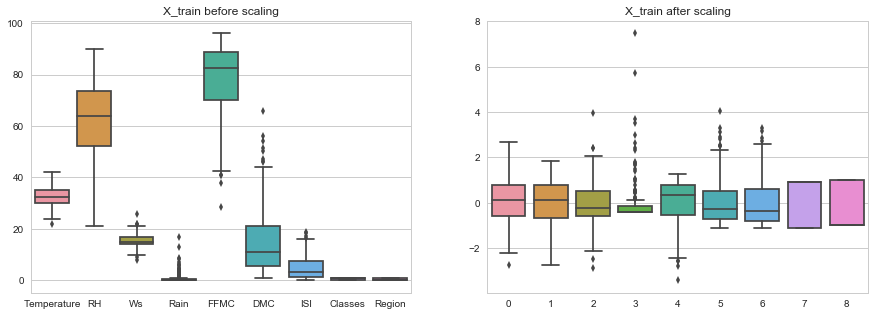

In [176]:
plt.subplots(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')


# Linear Regression

MAE 0.5468236465249988


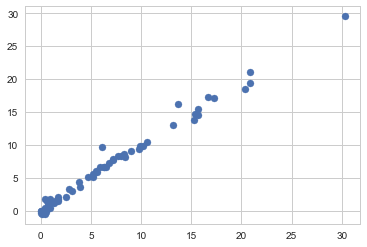

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)
plt.scatter(y_test,y_pred)

#### Also can be done like this

In [200]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
X_model= sm.add_constant(X_train_scaled)
X_test_model = sm.add_constant(X_test_scaled)




In [201]:
Linear_Regression = sm.OLS(y_train,X_model).fit()
Linear_Regression.params


const    7.156044
x1      -0.036345
x2      -0.174411
x3       0.007032
x4      -0.041082
x5      -0.823198
x6       3.698258
x7       4.840573
x8       0.404221
x9      -0.392599
dtype: float64

In [202]:
print(Linear_Regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     616.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          7.01e-126
Time:                        16:56:26   Log-Likelihood:                -310.05
No. Observations:                 182   AIC:                             640.1
Df Residuals:                     172   BIC:                             672.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1560      0.101     70.602      0.0

In [203]:
y_pred_test = Linear_Regression.predict(X_test_model)
y_pred_train = Linear_Regression.predict(X_model)

In [207]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.8211435242265254

Text(0,0.5,'Predicted')

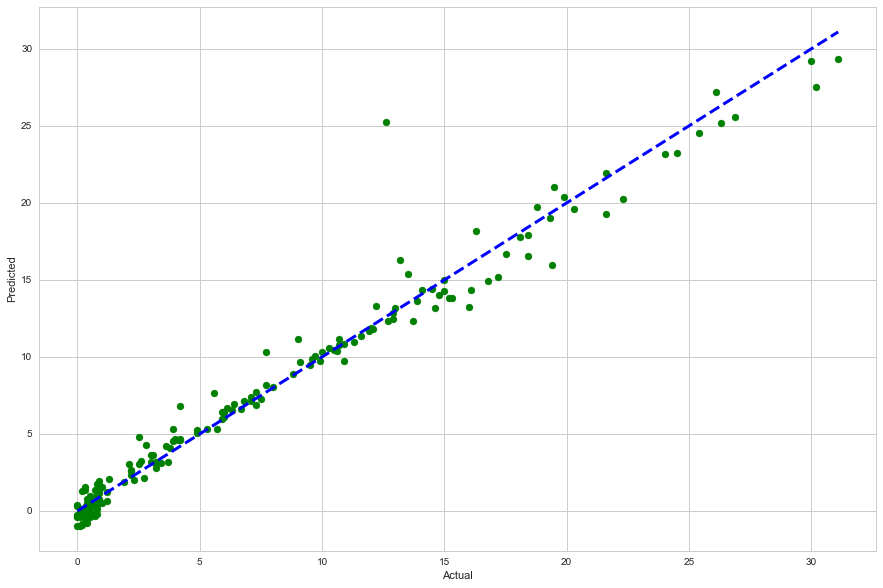

In [210]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Decision Tree (regression)

In [287]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42,max_depth=4)
tree.fit(X.values,y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [290]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


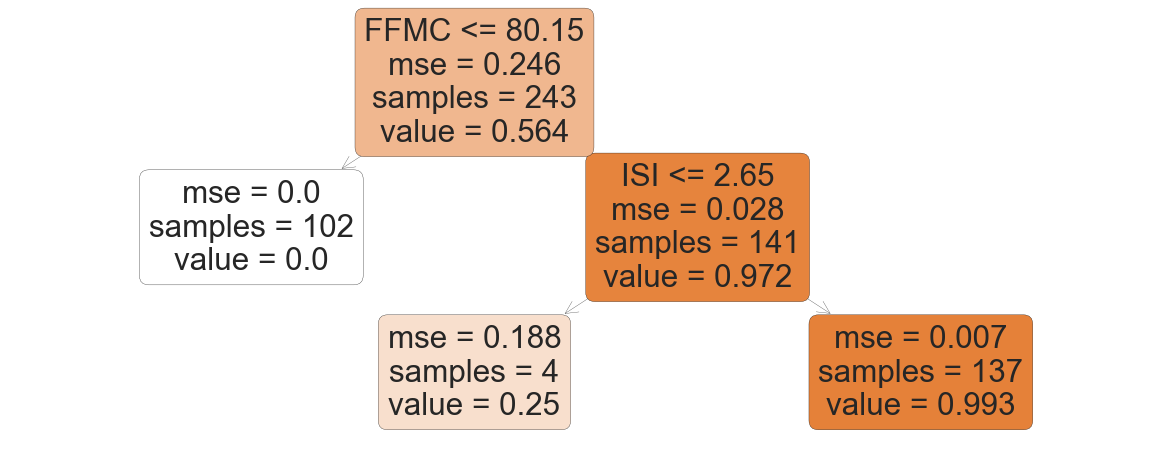

In [296]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree


# Assuming you have a DataFrame named 'hitters_data' with features 'X' and target variable 'y'

# Create a decision tree model
tree_forest_fire = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_forest_fire.fit(X.values, y)

# Plot the decision tree
plt.figure(figsize=(20, 8))
plot_tree(tree_forest_fire, feature_names=['Temperature', 'RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','Classes','Region'], class_names=['FWI'], filled=True, rounded=True)
plt.show()


In [298]:
from sklearn.metrics import mean_absolute_error

# Assuming you have a DataFrame named 'test_data' with features 'X_test' and target variable 'y_test'
# Use your test set to make predictions
y_pred = tree_forest_fire.predict(X_test_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.6065573770491803


# Logistic Regression

In [240]:
df2 = pd.read_csv('Algerian_forest_fire_clean_dataset.csv')

In [241]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [242]:
df2.drop(['day', 'month','year'], axis=1, inplace=True)

In [243]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [245]:
df2['Classes'].value_counts()

fire             131
not fire         101
fire               4
not fire           2
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [246]:
df2['Classes'] = np.where(df2['Classes'].str.contains('not fire'),0,1)

In [247]:
X = df2.drop('Classes',axis=1)
y = df2['Classes']

In [248]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [273]:
y.tail()

238    1
239    0
240    0
241    0
242    0
Name: Classes, dtype: int64

In [251]:
df2['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [260]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [280]:
y_test.value_counts()

1    37
0    24
Name: Classes, dtype: int64

In [262]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0.5,1,'X_train after scaling')

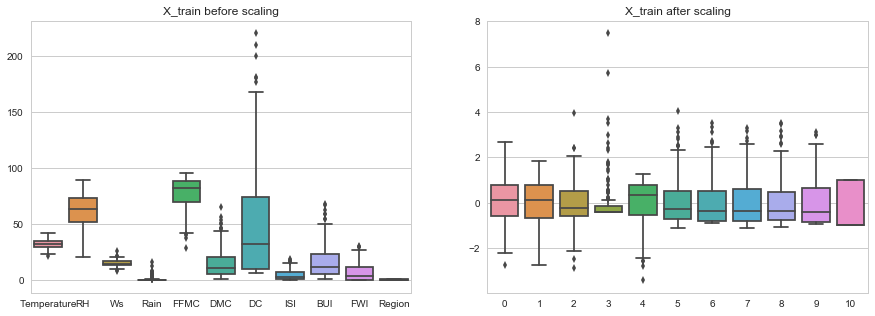

In [267]:
plt.subplots(figsize =(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaled)
plt.title('X_train after scaling')

In [269]:
logistic_regression = LogisticRegression( solver = 'newton-cg', random_state = 42)

logistic_regression.fit(X_train_scaled,y_train)

print(logistic_regression.intercept_,logistic_regression.coef_)     #Beta 0,  Beta 1,2,3,4... 


[1.41413463] [[ 0.13713097  0.1993023  -0.13802901  0.27196084  2.47673036 -0.024872
   0.34436618  2.26421929  0.1080968   1.77648071  0.1600399 ]]


In [281]:
y_pred = logistic_regression.predict(X_test_scaled) 
print(y_pred)

[1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1]


In [282]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9508196721311475
Confusion Matrix:
[[23  1]
 [ 2 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.97      0.95      0.96        37

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [283]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC =  0.9954954954954954
Decent since AUC > 0.5
0.5


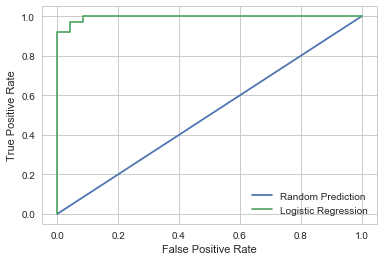

In [284]:
logistic_regression_probability = logistic_regression.predict_proba(X_test_scaled)
logistic_regression_probability = logistic_regression_probability[:,1]
logistic_regression_AUC = roc_auc_score(y_test,logistic_regression_probability)
print('AUC = ',logistic_regression_AUC)
if logistic_regression_AUC > 0.5:
    print('Decent since AUC > 0.5')
else:
    print('AUC not good')

prob_0 = [0 for _ in range(len(y_test))]
prob_0_auc = roc_auc_score(y_test,prob_0)
print(prob_0_auc)


logistic_regression_fpr,logistic_regression_tpr,_=roc_curve(y_test,logistic_regression_probability)
prob_0_fpr,prob_0_tpr,_=roc_curve(y_test,prob_0)

plt.plot(prob_0_fpr,prob_0_tpr,label='Random Prediction')
plt.plot(logistic_regression_fpr,logistic_regression_tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Decision Tree (Classifier)

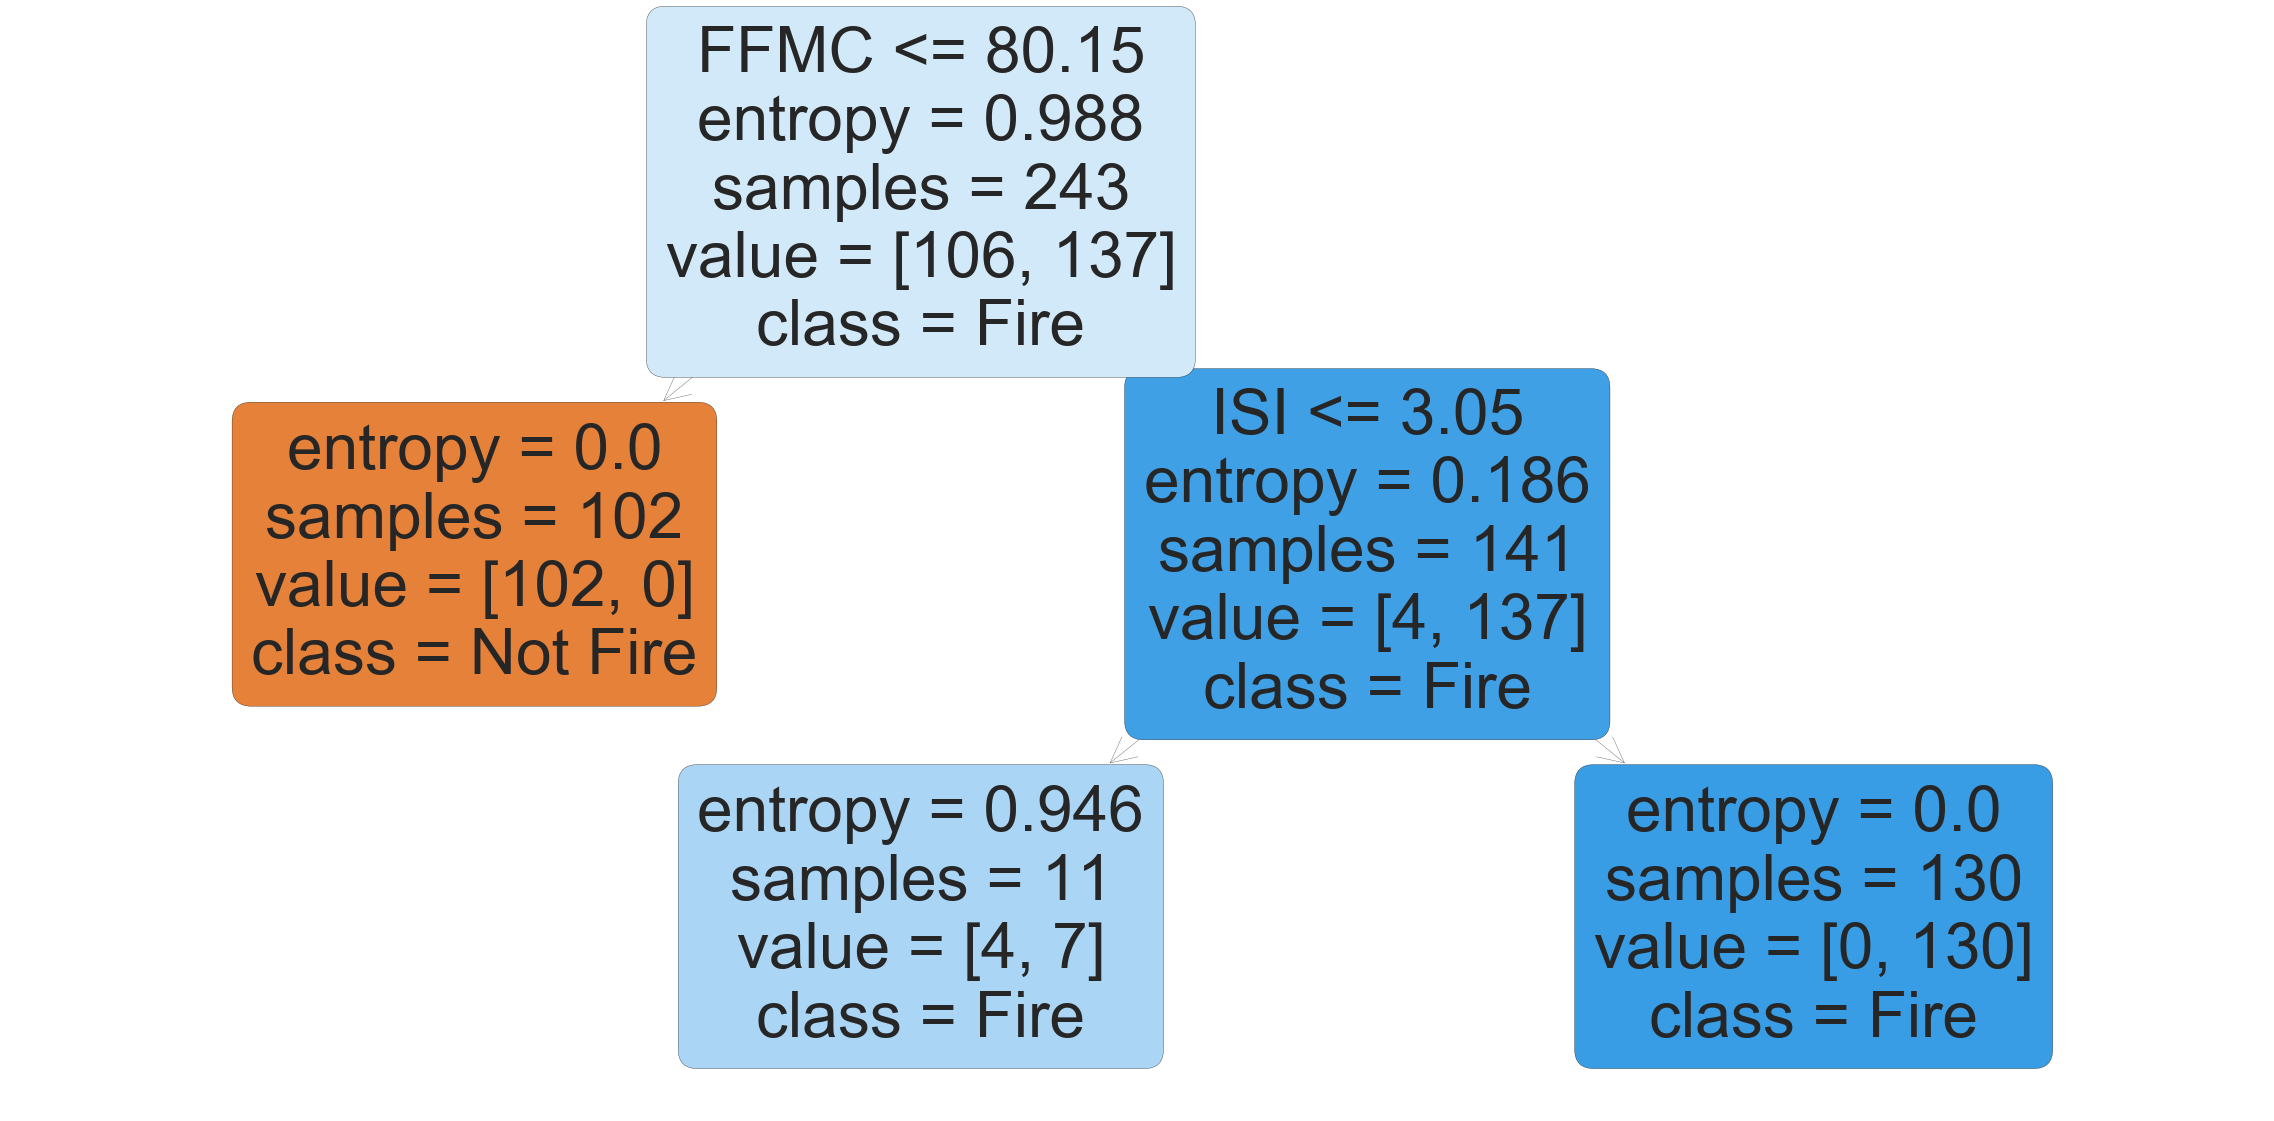

In [300]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier_survived = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 2)
classifier_survived.fit(X,y)

plt.figure(figsize = (40,20))
tree.plot_tree(classifier_survived, feature_names = ['Temperature', 'RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'], class_names=['Not Fire', 'Fire'], filled=True, rounded=True)
plt.show()

In [301]:
y_prediction = classifier_survived.predict(X)

from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y,y_prediction))
confusion_matrix(y,y_prediction)

0.9835390946502057


array([[102,   4],
       [  0, 137]])